In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib import cm

In [3]:
train = pd.read_csv(r"C:\Users\deepa\Downloads\playground-series-s5e9\train.csv")
test = pd.read_csv(r"C:\Users\deepa\Downloads\playground-series-s5e9\test.csv")
submission = pd.read_csv(r"C:\Users\deepa\Downloads\playground-series-s5e9\sample_submission.csv")

In [4]:
train.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [5]:
test.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [6]:
submission.head()

,id,BeatsPerMinute
0,524164,119.035
1,524165,119.035
2,524166,119.035
3,524167,119.035
4,524168,119.035


In [7]:
train.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,524164.0,262081.500000,151313.257586,0.000000,131040.750000,262081.500000,393122.250000,524163.000000
RhythmScore,524164.0,0.632843,0.156899,0.076900,0.515850,0.634686,0.739179,0.975000
AudioLoudness,524164.0,-8.379014,4.616221,-27.509725,-11.551933,-8.252499,-4.912298,-1.357000
VocalContent,524164.0,0.074443,0.049939,0.023500,0.023500,0.066425,0.107343,0.256401
AcousticQuality,524164.0,0.262913,0.223120,0.000005,0.069413,0.242502,0.396957,0.995000
InstrumentalScore,524164.0,0.117690,0.131845,0.000001,0.000001,0.074247,0.204065,0.869258
LivePerformanceLikelihood,524164.0,0.178398,0.118186,0.024300,0.077637,0.166327,0.268946,0.599924
MoodScore,524164.0,0.555843,0.225480,0.025600,0.403921,0.564817,0.716633,0.978000
TrackDurationMs,524164.0,241903.692949,59326.601501,63973.000000,207099.876625,243684.058150,281851.658500,464723.228100
Energy,524164.0,0.500923,0.289952,0.000067,0.254933,0.511800,0.746000,1.000000


In [10]:
train.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [11]:
# keep ids for submission
test_ids = test['id'] if 'id' in test.columns else None

In [12]:
train.corr()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,1.000000,0.000196,0.001037,-0.000863,0.001172,-0.000371,-0.000300,0.001597,-0.001508,0.000177,-0.000355
RhythmScore,0.000196,1.000000,-0.017385,0.008737,0.028203,0.010992,0.031535,-0.008946,-0.017640,-0.147350,0.005440
AudioLoudness,0.001037,-0.017385,1.000000,-0.009357,-0.013019,0.003772,-0.021620,-0.027305,0.004510,0.192411,-0.003327
VocalContent,-0.000863,0.008737,-0.009357,1.000000,0.009370,-0.017739,-0.120294,0.058675,0.018179,0.016124,0.004876
AcousticQuality,0.001172,0.028203,-0.013019,0.009370,1.000000,0.003247,0.009678,0.037047,-0.022524,-0.418184,-0.000820
InstrumentalScore,-0.000371,0.010992,0.003772,-0.017739,0.003247,1.000000,-0.002403,0.004738,0.009340,-0.019834,0.001900
LivePerformanceLikelihood,-0.000300,0.031535,-0.021620,-0.120294,0.009678,-0.002403,1.000000,0.015461,0.005179,-0.266256,0.003471
MoodScore,0.001597,-0.008946,-0.027305,0.058675,0.037047,0.004738,0.015461,1.000000,-0.014803,-0.241713,0.007059
TrackDurationMs,-0.001508,-0.017640,0.004510,0.018179,-0.022524,0.009340,0.005179,-0.014803,1.000000,0.048597,0.006637
Energy,0.000177,-0.147350,0.192411,0.016124,-0.418184,-0.019834,-0.266256,-0.241713,0.048597,1.000000,-0.004375


In [13]:
corr = train.corr()['BeatsPerMinute'].sort_values(ascending=False)
print(corr)
# 1.0 → perfect self-correlation (with itself).
# 0.72 → strong positive correlation.
# 0.35) → moderate positive correlation.
# -0.10 → weak negative correlation.

BeatsPerMinute               1.000000
MoodScore                    0.007059
TrackDurationMs              0.006637
RhythmScore                  0.005440
VocalContent                 0.004876
LivePerformanceLikelihood    0.003471
InstrumentalScore            0.001900
id                          -0.000355
AcousticQuality             -0.000820
AudioLoudness               -0.003327
Energy                      -0.004375
Name: BeatsPerMinute, dtype: float64


<Axes: >

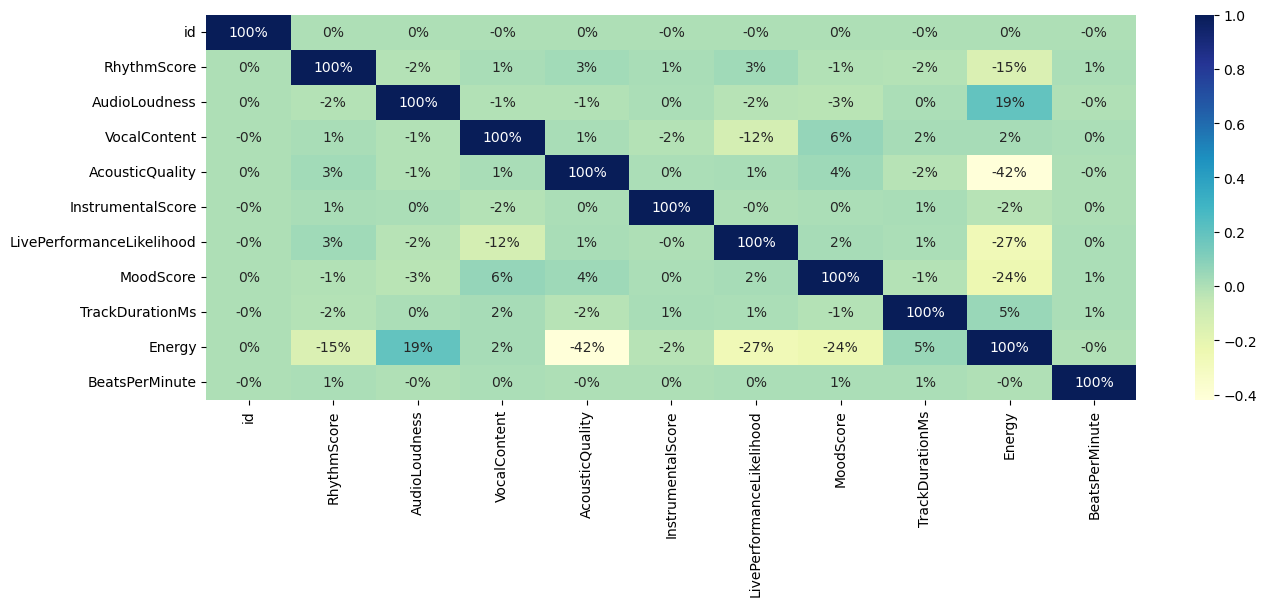

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu",fmt='.0%')

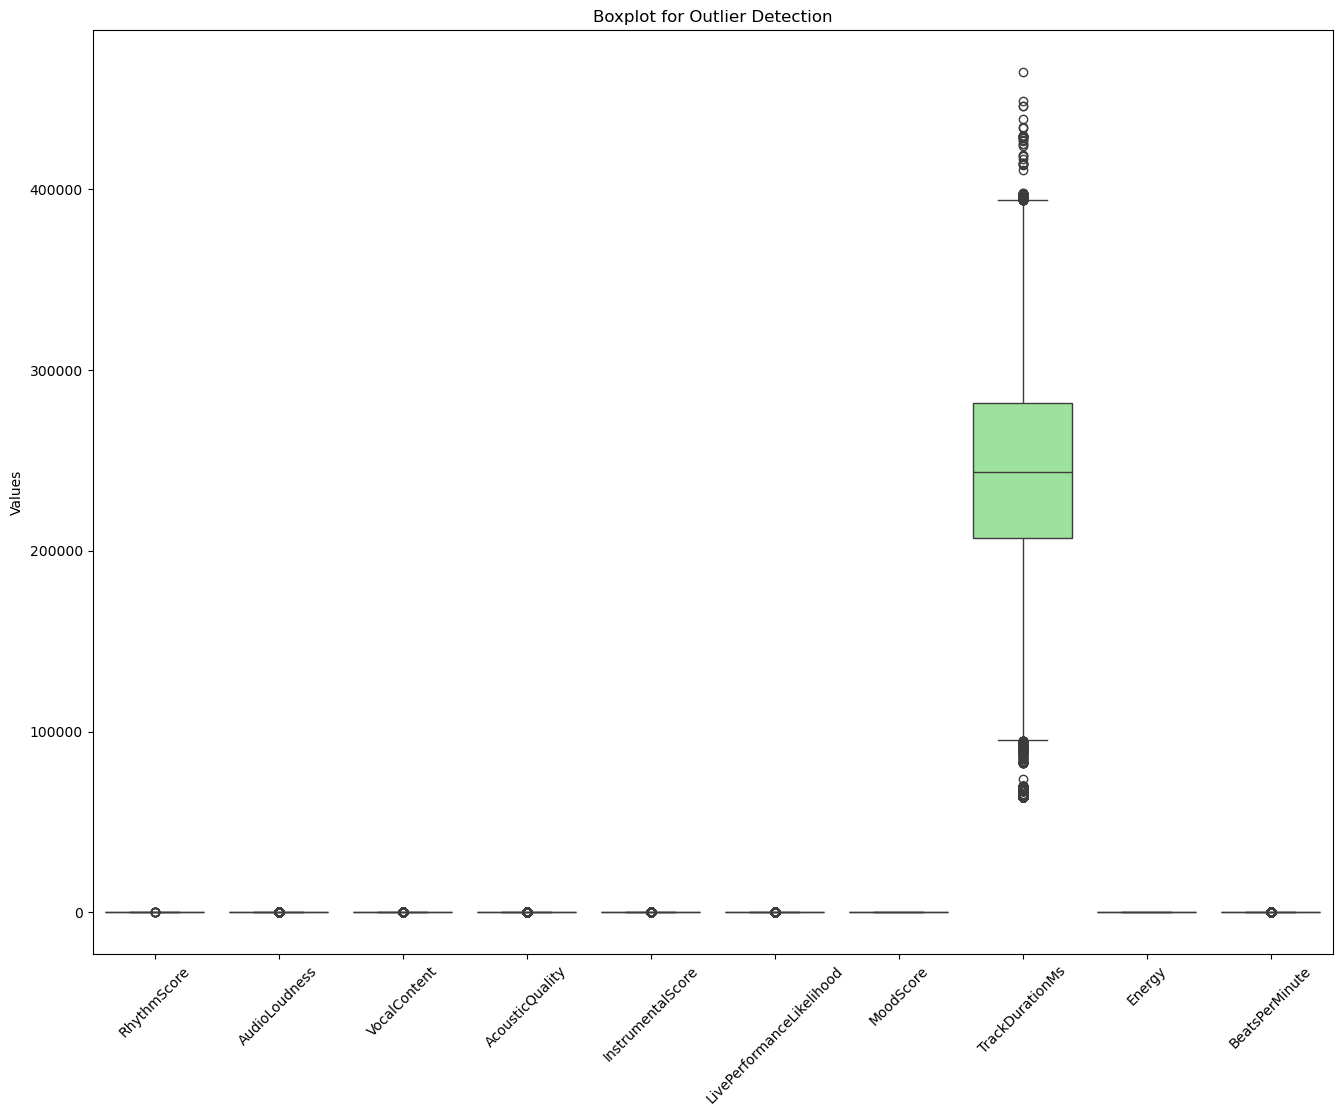

In [15]:
# Plotting the box to find out the outliers
features = train.drop(columns=["id"],errors="ignore")
plt.figure(figsize=(16,12))
sns.boxplot(data= features, color="lightgreen")
plt.xticks(rotation = 45)
plt.title("Boxplot for Outlier Detection")
plt.ylabel("Values")
plt.grid(False)
plt.show()

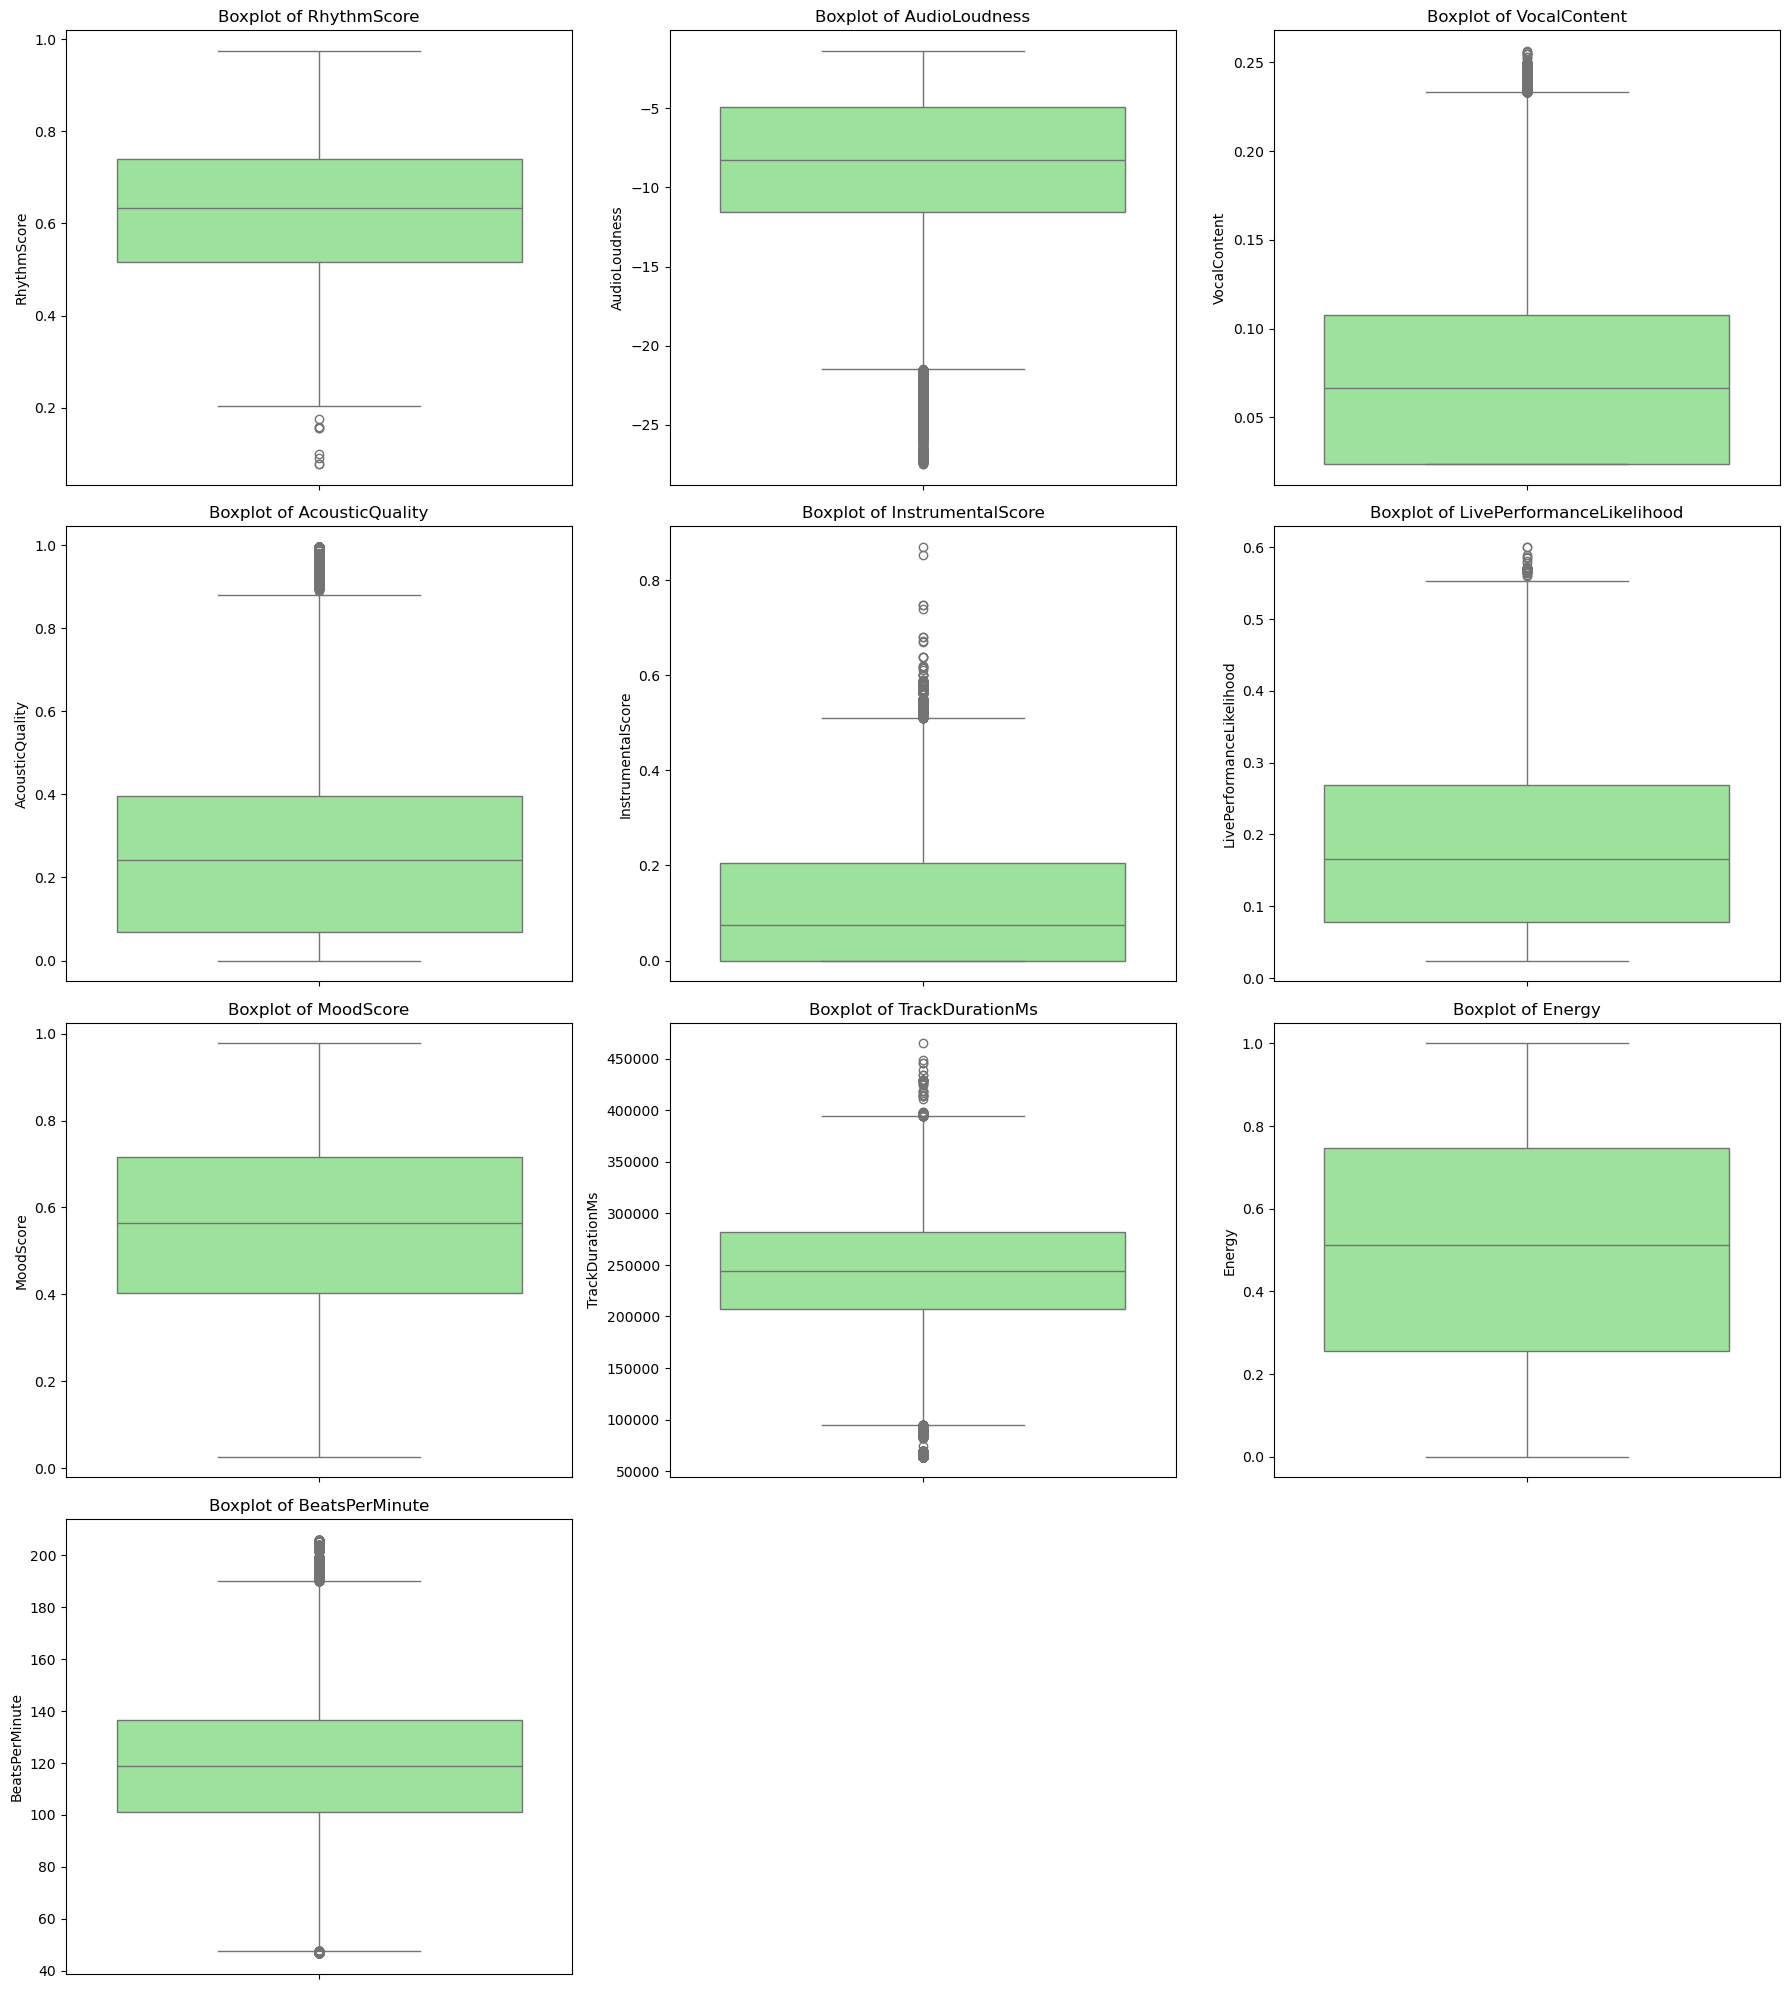

In [16]:
import math

# number of columns in features
n_cols = features.shape[1]

# set grid size (adjust rows & cols as needed)
n_rows = math.ceil(n_cols / 3)   # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))

# flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(features.columns):
    sns.boxplot(y=features[col], color="lightgreen", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].grid(False)

# hide any empty subplots if columns < grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
num_cols = train.select_dtypes(include=np.number).columns

In [18]:
train[num_cols].skew()

id                           1.082694e-15
RhythmScore                  1.681546e-01
AudioLoudness               -3.085136e-01
VocalContent                 7.891116e-01
AcousticQuality              7.859655e-01
InstrumentalScore            1.036285e+00
LivePerformanceLikelihood    3.933217e-01
MoodScore                   -2.688198e-01
TrackDurationMs             -1.904829e-01
Energy                      -3.034354e-02
BeatsPerMinute               7.154987e-02
dtype: float64

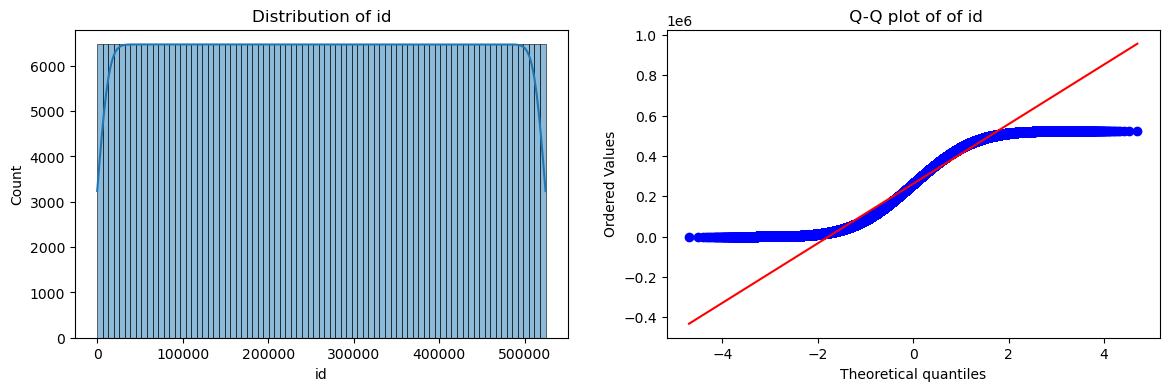

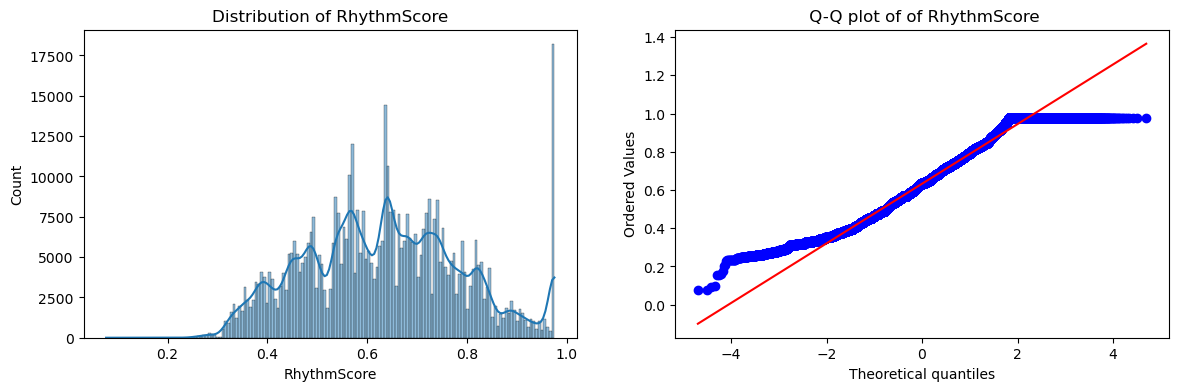

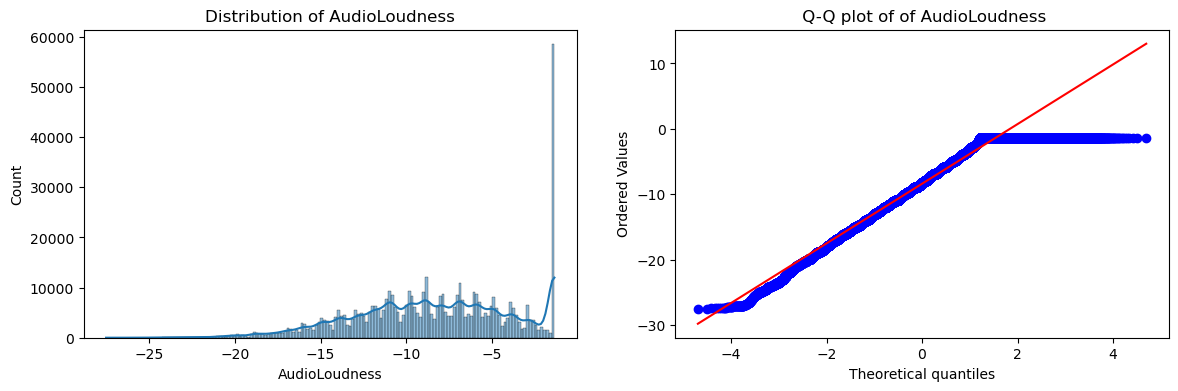

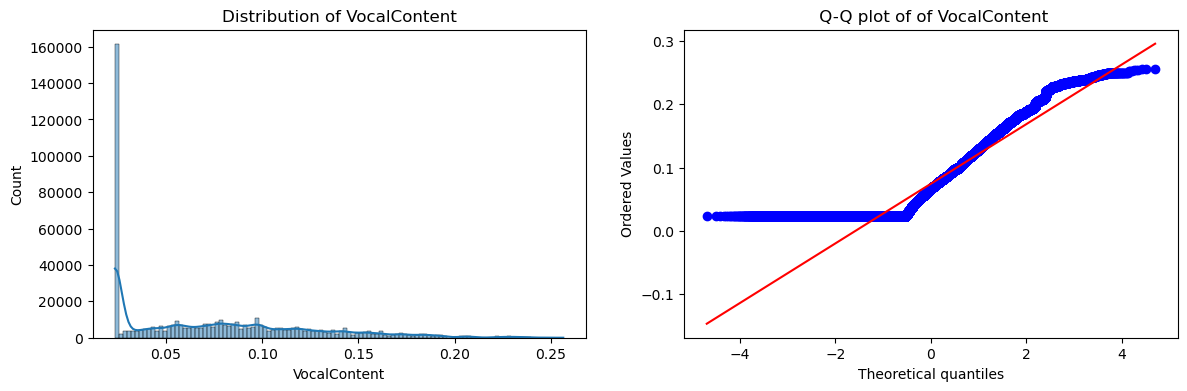

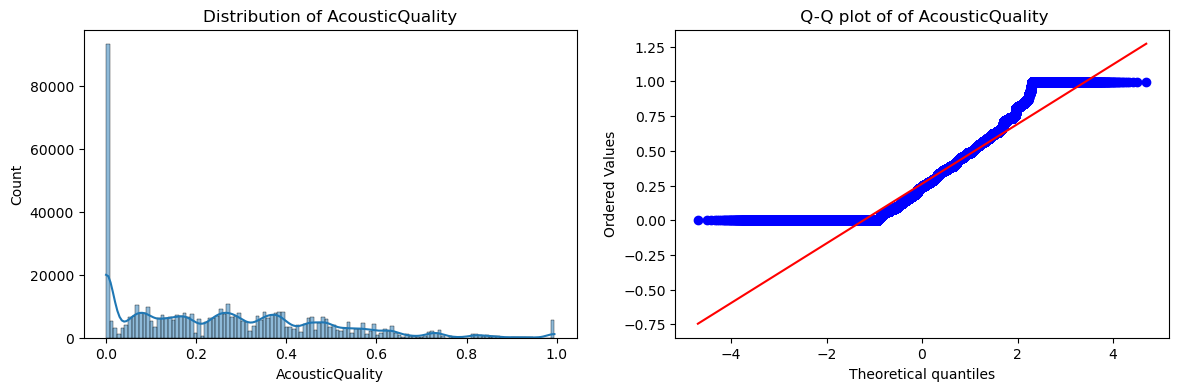

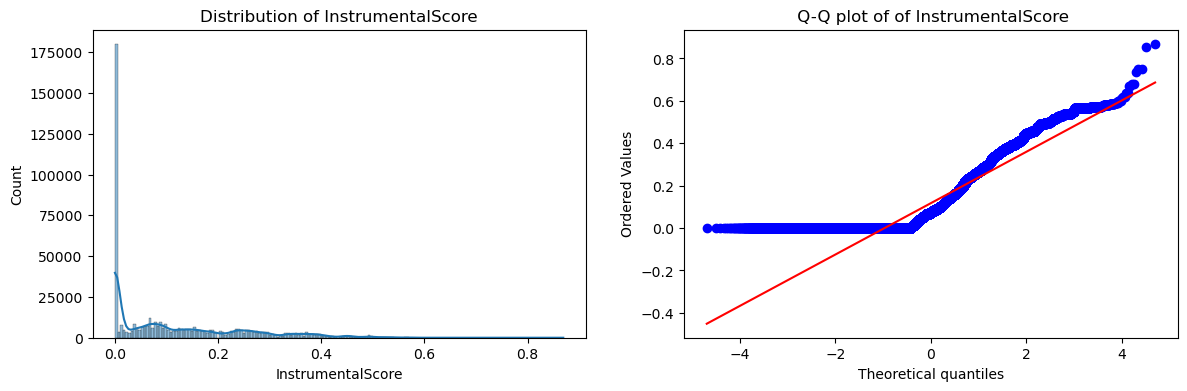

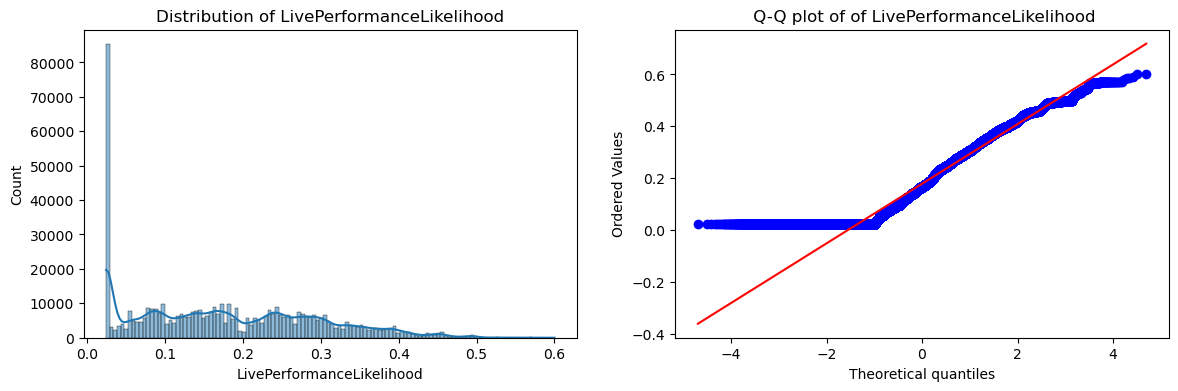

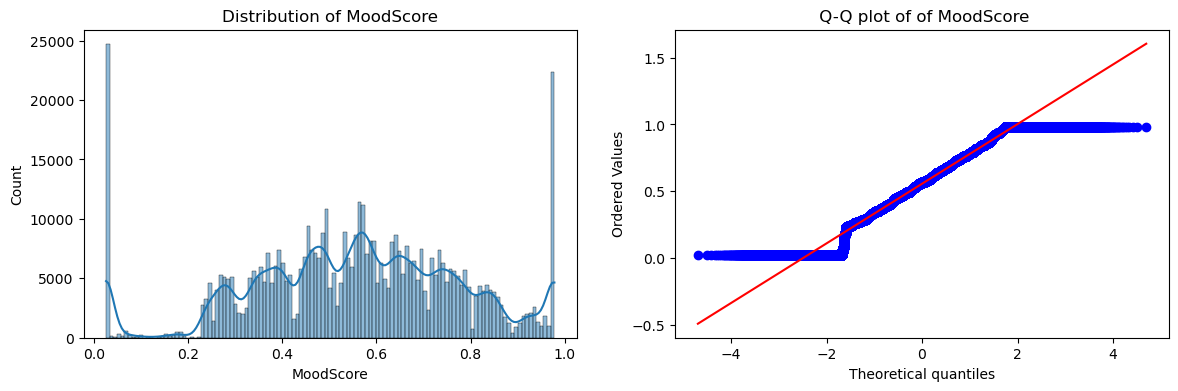

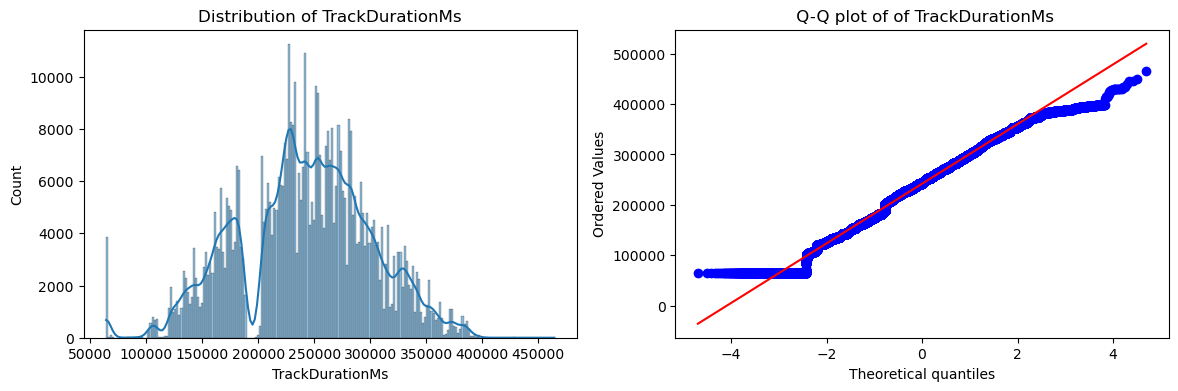

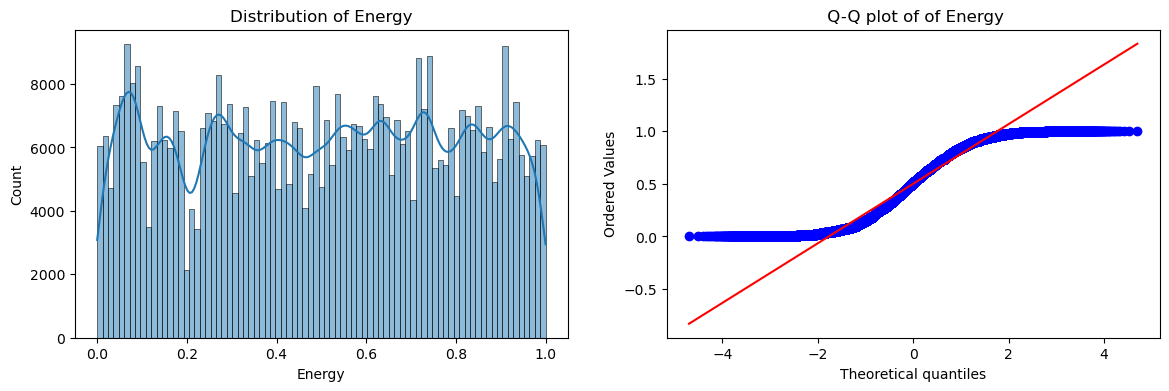

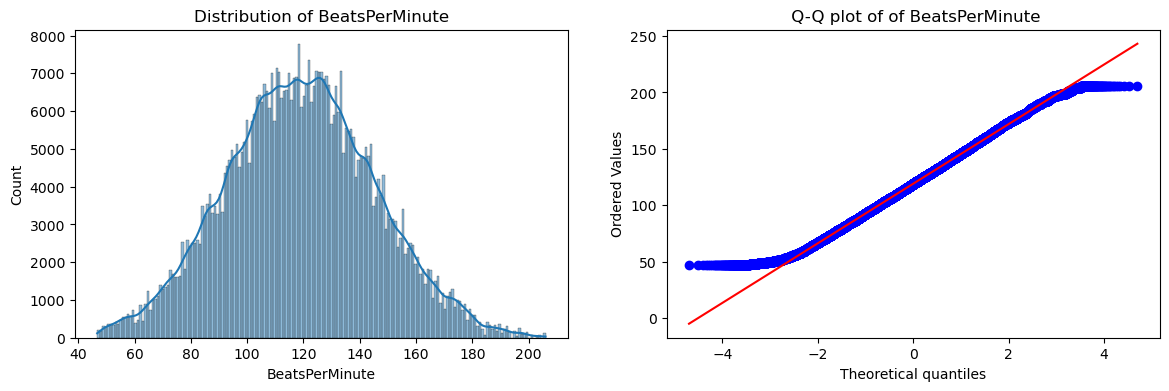

In [19]:
# Plotting the displots without any transformation
import scipy.stats as stats
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns.drop("id",errors = "ignore")
for col in train.columns:
   fig, axes = plt.subplots(1, 2, figsize=(14,4))
   sns.histplot(train[col], kde = True, ax = axes[0])
   axes[0].set_title(f"Distribution of {col}")
    
   plt.subplot(122)
   stats.probplot(train[col], dist = "norm", plot = axes[1])
   axes[1].set_title(f" Q-Q plot of of {col}")
   plt.show()

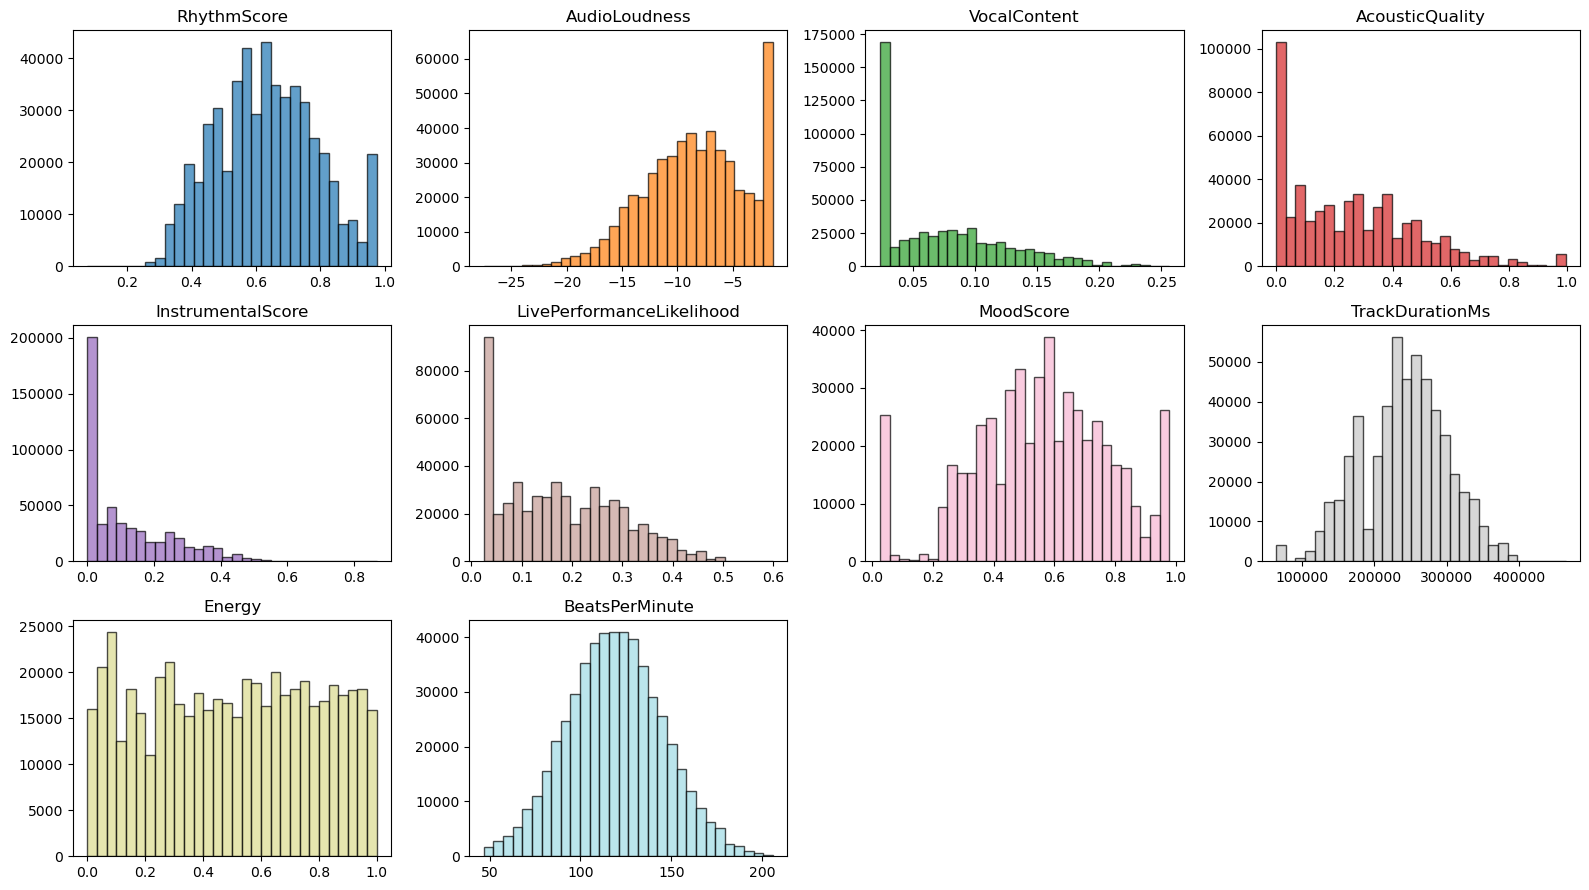

In [20]:
numeric_cols = train.drop('id', axis = 1, errors="ignore").select_dtypes(include=['int64', 'float64']).columns
n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
bins = 30  

colors = cm.tab20(np.linspace(0, 1, len(numeric_cols)))

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, (col, color) in enumerate(zip(numeric_cols, colors), 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(train[col], bins=bins, edgecolor='black', alpha=0.7, color=color)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [21]:
# Define the function to remove outliers based on IQR
def remove_outliers_iqr(dataframe, columns):
    cleaned_df = dataframe.copy()
    for column in columns:
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df

# List of numerical columns to check for outliers
columns_to_check = [
    'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
    'TrackDurationMs', 'Energy', 'BeatsPerMinute'
]

# Remove outliers
df_cleaned = remove_outliers_iqr(train, columns_to_check)

# Optional: Print shape before and after
print("Original shape:", train.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (524164, 11)
Cleaned shape: (505206, 11)


In [22]:
# Separate 'id' column from features and target
ids = df_cleaned['id']  # Keep the 'id' column for the final result
X  = df_cleaned.drop(columns = ['BeatsPerMinute', 'id']) # Drop 'id' and target column
y = df_cleaned['BeatsPerMinute'] # Set 'BeatsPerMinute' as the target variable
# X = df.drop("BeatsPerMinute",axis=1) # Independent, label
# y = df["BeatsPerMinute"] # dependent target

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
### Skewness Fix(Yeo-)
from sklearn.preprocessing import PowerTransformer, StandardScaler
pt = PowerTransformer(method = 'yeo-johnson')
X_train_transformed = pd.DataFrame(pt.fit_transform(X_train),columns = X_train.columns)
X_test_transformed = pd.DataFrame(pt.transform(X_test),columns = X_test.columns)

In [25]:
### Scaling (Standard Scaler)
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_transformed),columns = X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test_transformed),columns = X_test.columns)

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [28]:
y_tree_pred = dtree_model.predict(X_test_scaled)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
print('mean_absolute_error is: ',mean_absolute_error(y_test,y_tree_pred))
print("mean_squared_error is: ",mean_squared_error(y_test,y_tree_pred))
print('root_mean_sq_error is equals to: ',np.sqrt(mean_squared_error(y_test,y_tree_pred)))

mean_absolute_error is:  30.240662375859387
mean_squared_error is:  1419.7593137551785
root_mean_sq_error is equals to:  37.6796936526185


In [31]:
y_tree_pred[:5]

array([ 65.06113, 133.91417, 132.80624, 167.18237, 171.77594])

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [33]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting Regressor:")
print("RMSE:",rmse)
print("R² Score:", r2_score(y_test, y_pred_gbr))

Gradient Boosting Regressor:
RMSE: 26.07333490928425
R² Score: 0.00046852472951608437


In [34]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\nXGBoost:")
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
RMSE: 26.15249652219148
R² Score: -0.005610071624986501


In [35]:
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train_scaled, y_train)
y_pred_lgb = lgb.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print("\nLightGBM:")
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 353644, number of used features: 9
[LightGBM] [Info] Start training from score 118.783840

LightGBM:
RMSE: 26.08070255776584
R² Score: -9.643844433315785e-05


In [36]:
test_ids

0         524164
1         524165
2         524166
3         524167
4         524168
           ...  
174717    698881
174718    698882
174719    698883
174720    698884
174721    698885
Name: id, Length: 174722, dtype: int64

In [37]:
# Load test set (already loaded as 'test')
test_ids = test['id']
X_test_actual = test.drop(columns=['id'], errors='ignore')  # Drop 'id' (no 'BeatsPerMinute' in test)

# Ensure the columns are in the same order as the training set
X_test_actual = X_test_actual[X_train.columns]


X_test_actual_transformed = pd.DataFrame(
    pt.transform(X_test_actual), 
    columns=X_test_actual.columns
)
X_test_actual_scaled = pd.DataFrame(
    sc.transform(X_test_actual_transformed), 
    columns=X_test_actual.columns
)

# Predict using your best model
final_predictions = lgb.predict(X_test_actual_scaled)

print("lgb_Prediction: \n",final_predictions)

# Create submission file
submission_df = pd.DataFrame({
    'id': test_ids,
    'BeatsPerMinute': final_predictions
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

lgb_Prediction: 
 [118.92181126 117.93789845 119.03889808 ... 119.48677251 120.08834891
 119.22739961]
Submission file created: submission.csv
